In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    "beta": np.random.beta(5,1,1000)*60,
    "exponential": np.random.exponential(10,1000),
    "normal_p": np.random.normal(10,2,1000), # normal platykurtic
    "normal_l": np.random.normal(10,10,1000), #normal leptokurtic
    
})

first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half,second_half])
df["bimodal"] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.909723,8.596624,13.612924,25.068356,20.734948
1,57.206596,22.597988,9.341574,13.038516,22.986237
2,44.009009,21.980281,10.816025,23.532341,20.698508
3,53.875769,11.242569,12.597788,12.423501,25.560053
4,47.153545,0.196548,6.838326,19.055666,22.443657


<AxesSubplot: ylabel='Density'>

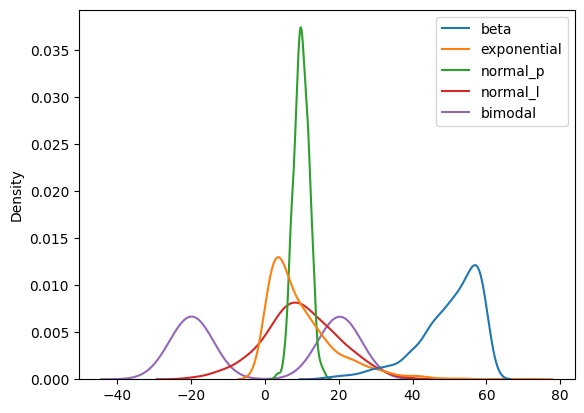

In [3]:
sns.kdeplot(data=df)

In [5]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.995901,10.053406,9.910352,9.788037,0.145182
std,8.609373,9.421286,2.087745,10.217440,20.344461
min,15.870334,0.011185,3.046365,-21.640853,-28.997715
25%,45.581607,3.272402,8.515503,3.379759,-19.622712
50%,52.033673,7.257311,9.901979,9.377314,0.102343
75%,56.875272,14.081480,11.403006,16.682357,20.297681
max,59.992480,70.752228,16.296598,44.950833,29.736139


<AxesSubplot: ylabel='Density'>

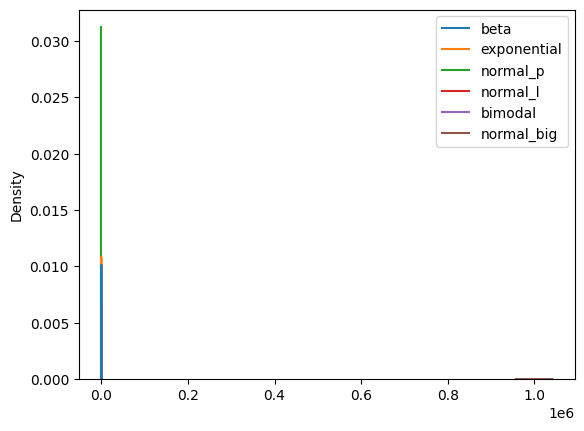

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1)) #normal distribution of large values
df["normal_big"] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

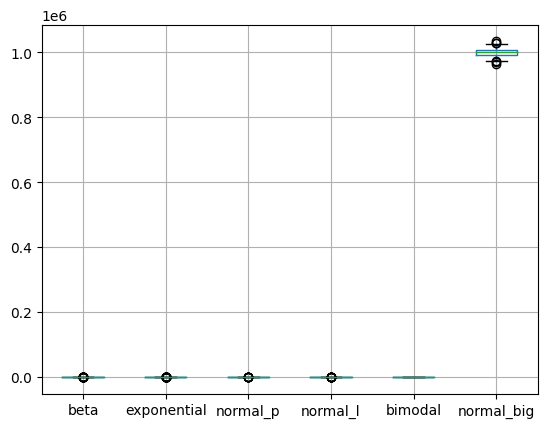

In [7]:
df.boxplot()

In [8]:
s_scaler = StandardScaler()

In [9]:
df_s = s_scaler.fit_transform(df)

In [10]:
col_names = list(df.columns)
df_s = pd.DataFrame(df_s,columns = col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,1.035881,-0.154704,1.774367,1.496262,1.012564,-1.549477
1,0.837959,1.332181,-0.272572,0.318290,1.123278,-1.350247
2,-0.695740,1.266583,0.434022,1.345854,1.010772,-0.335059
3,0.450882,0.126284,1.287887,0.258067,1.249853,1.399901
4,-0.330312,-1.046756,-1.472193,0.907494,1.096595,0.057418


<AxesSubplot: ylabel='Density'>

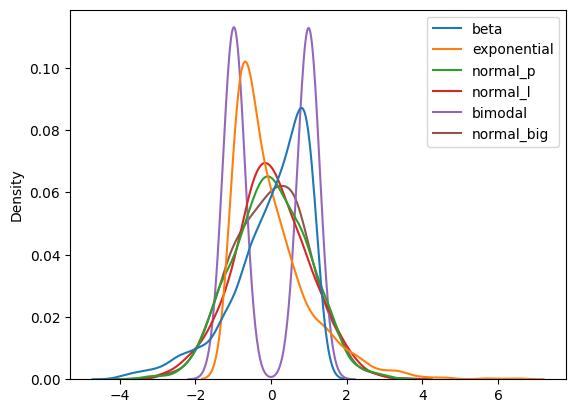

In [11]:
sns.kdeplot(data = df_s)

In [12]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-5.826450e-16,-1.207923e-16,3.428369e-16,-9.237056e-17,-5.684342e-17,4.476419e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.965752e+00,-1.066441e+00,-3.289397e+00,-3.077544e+00,-1.433190e+00,-3.521316e+00
25%,-5.129878e-01,-7.201136e-01,-6.684466e-01,-6.275041e-01,-9.721460e-01,-7.095638e-01
50%,2.368108e-01,-2.969333e-01,-4.012558e-03,-4.021833e-02,-2.106773e-03,4.690753e-02
75%,7.994558e-01,4.277642e-01,7.153179e-01,6.750976e-01,9.910601e-01,6.739615e-01
max,1.161708e+00,6.445956e+00,3.060451e+00,3.443171e+00,1.455225e+00,3.498509e+00


<AxesSubplot: >

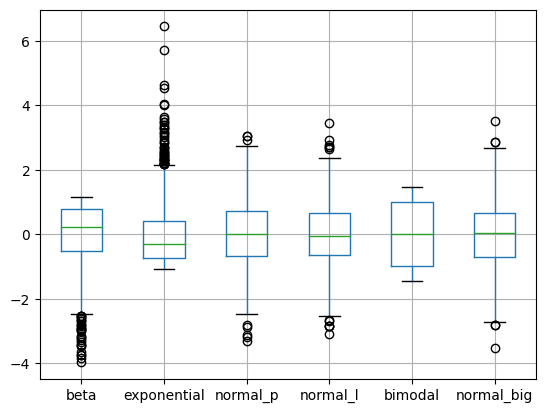

In [13]:
df_s.boxplot()